In [1]:
md_reference_data = None
upstream = None
product = None

In [2]:
# declare a list tasks whose products you want to use as inputs
upstream = None


# R23 - MD alignment and RMSD extraction 

## Contents

1. Alignment
2. RMSD
3. RMSD against average structure
4. RMSD over subunit
5. RMSF

## Alignment and preparation

In [111]:
from mdtools.mapping import map_alignment_to_structure, align_structure_sequences
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
from pyfamsa import Aligner, Sequence
import json
import pandas as pd
import prody as pdy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import prody as pdy
import MDAnalysis as mda
# from pyfamsa import Aligner, Sequence
from yaml import load, Loader
from Bio import AlignIO
from Bio.SeqUtils import seq1
from Bio.SeqIO import SeqRecord
from Bio import SeqIO
from Bio.Seq import Seq
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sk_pca
from MDAnalysis.analysis import align
import pickle
import tqdm
plt.rcParams['svg.fonttype'] = 'none'
#matplotlib.rcParams['fontname'] = "Arial"

In [36]:
code_palette_cap = {
    "6FTL": "#C6E1AB",
    "3ZXW": "#C6E1AB",
    "8RUC": "#C6E1AB",
    "1BWV": "#C6E1AB",
    "7SNV": "#C6E1AB",
    "6URA": "#C6E1AB",
    "9RUB": "#C6E1AB",
    "Anc-IIp": "#D1BADA",
    "Anc-Ip": "#D1BADA",
    "Anc-I": "#D1BADA",
    "Anc-IAB": "#D1BADA",
    "Anc-ICD": "#D1BADA",
    "Anc-IA": "#D1BADA",
    "Anc-IB": "#D1BADA",
    "anci-wo-ssu": "#D1BADA"
}

In [2]:
md_reference_data = load(open("../env.yaml"), Loader)['experiment_01']

In [105]:
exp01_rmsd_rep1 = pd.read_pickle('./exp01_rmsd_rep_1.pkl')
exp01_rmsd_rep2 = pd.read_pickle('./exp01_rmsd_rep_2.pkl')

In [106]:
exp01_rmsd_rep1['code'] = exp01_rmsd_rep1['code'].replace({'1bwv': '1BWV', '3zxw': '3ZXW', '6ftl': '6FTL', '6ura': '6URA', '7snv': '7SNV', '8ruc': '8RUC', '9rub': '9RUB', 'anci': 'Anc-I', 'ancia': 'Anc-IA', 'anciab': 'Anc-IAB', 'ancib': 'Anc-IB', 'ancicd': 'Anc-ICD', 'anciip': "Anc-IIp", 'ancip': "Anc-Ip"})
exp01_rmsd_rep2['code'] = exp01_rmsd_rep2['code'].replace({'1bwv': '1BWV', '3zxw': '3ZXW', '6ftl': '6FTL', '6ura': '6URA', '7snv': '7SNV', '8ruc': '8RUC', '9rub': '9RUB', 'anci': 'Anc-I', 'ancia': 'Anc-IA', 'anciab': 'Anc-IAB', 'ancib': 'Anc-IB', 'ancicd': 'Anc-ICD', 'anciip': "Anc-IIp", 'ancip': "Anc-Ip"})

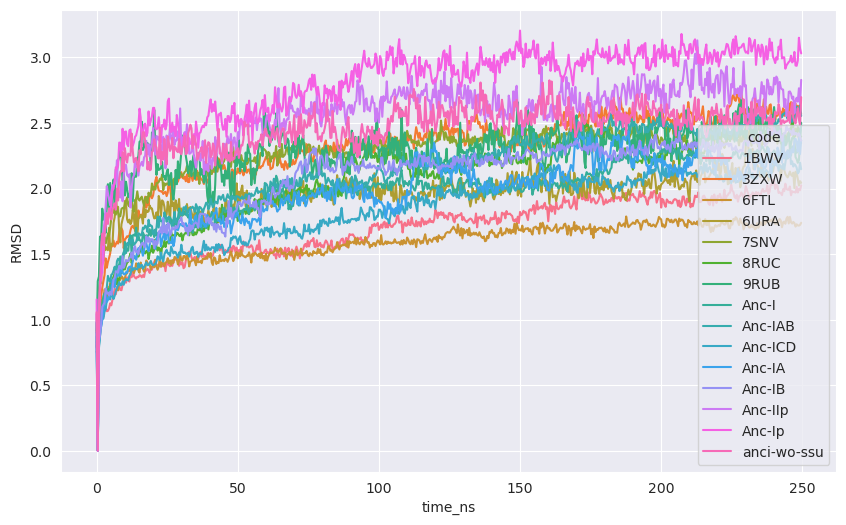

In [112]:
plt.figure(figsize=(10,6))
sns.lineplot(data=exp01_rmsd_rep1, x="time_ns", y="CA", hue="code")
plt.ylabel('RMSD')
# plt.axvline(50, color='black', linestyle="--")
# plt.show()
plt.savefig("./Overall_RMSD_CA_250ns_rep_1.svg")
# plt.ylabel('RMSD')

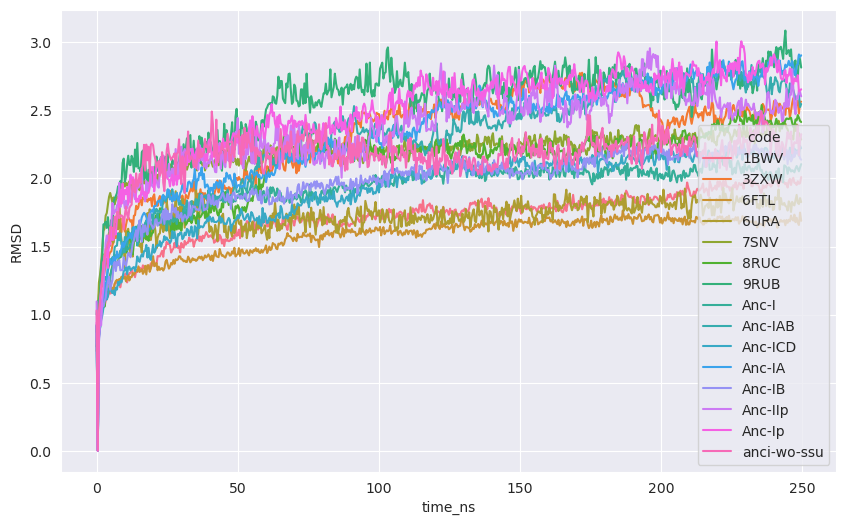

In [108]:
plt.figure(figsize=(10,6))
sns.lineplot(data=exp01_rmsd_rep2, x="time_ns", y="CA", hue="code")
plt.ylabel('RMSD')
# plt.axvline(50, color='black', linestyle="--")
# plt.show()
plt.savefig("./Overall_RMSD_CA_250ns_rep_2.svg")
# plt.ylabel('RMSD')

In [109]:
exp01_rmsd_rep1['rep'] = "Rep_1"
exp01_rmsd_rep2['rep'] = "Rep_2"
exp01_rmsd = pd.concat([exp01_rmsd_rep1, exp01_rmsd_rep2], ignore_index=True)

window_size = 30
exp01_rmsd['CA_moving_avg'] = exp01_rmsd.groupby(['code', 'rep'])['CA'].transform(lambda x: x.rolling(window_size, min_periods=1).mean())
exp01_rmsd

,frame,time,CA,upperSSU,lowerSSU,ssu,upperLSU,lowerLSU,lsu,code,time_ns,rep,CA_moving_avg
0,0,0.000000,0.792620,0.913764,0.899862,0.906840,0.763346,0.748524,0.755971,1BWV,0.0,Rep_1,0.792620
1,1,0.048888,0.857642,0.904627,0.922675,0.913695,0.813154,0.867076,0.840548,1BWV,0.4,Rep_1,0.825131
2,2,0.097776,0.964732,1.124630,1.103657,1.114193,0.903056,0.929632,0.916440,1BWV,0.8,Rep_1,0.871665
3,3,0.146665,0.955489,1.039781,1.059277,1.049574,0.925316,0.927036,0.926177,1BWV,1.2,Rep_1,0.892621
4,4,0.195553,1.011892,1.102260,1.173955,1.138672,0.992230,0.950736,0.971705,1BWV,1.6,Rep_1,0.916475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,620,620.000020,2.261716,NaN,NaN,NaN,2.298707,2.224110,2.261716,anci-wo-ssu,248.0,Rep_2,2.287607
18746,621,621.000020,2.389217,NaN,NaN,NaN,2.472477,2.302948,2.389217,anci-wo-ssu,248.4,Rep_2,2.288716
18747,622,622.000020,2.169963,NaN,NaN,NaN,2.182310,2.157545,2.169963,anci-wo-ssu,248.8,Rep_2,2.280347
18748,623,623.000020,2.278286,NaN,NaN,NaN,2.346764,2.207685,2.278286,anci-wo-ssu,249.2,Rep_2,2.275642


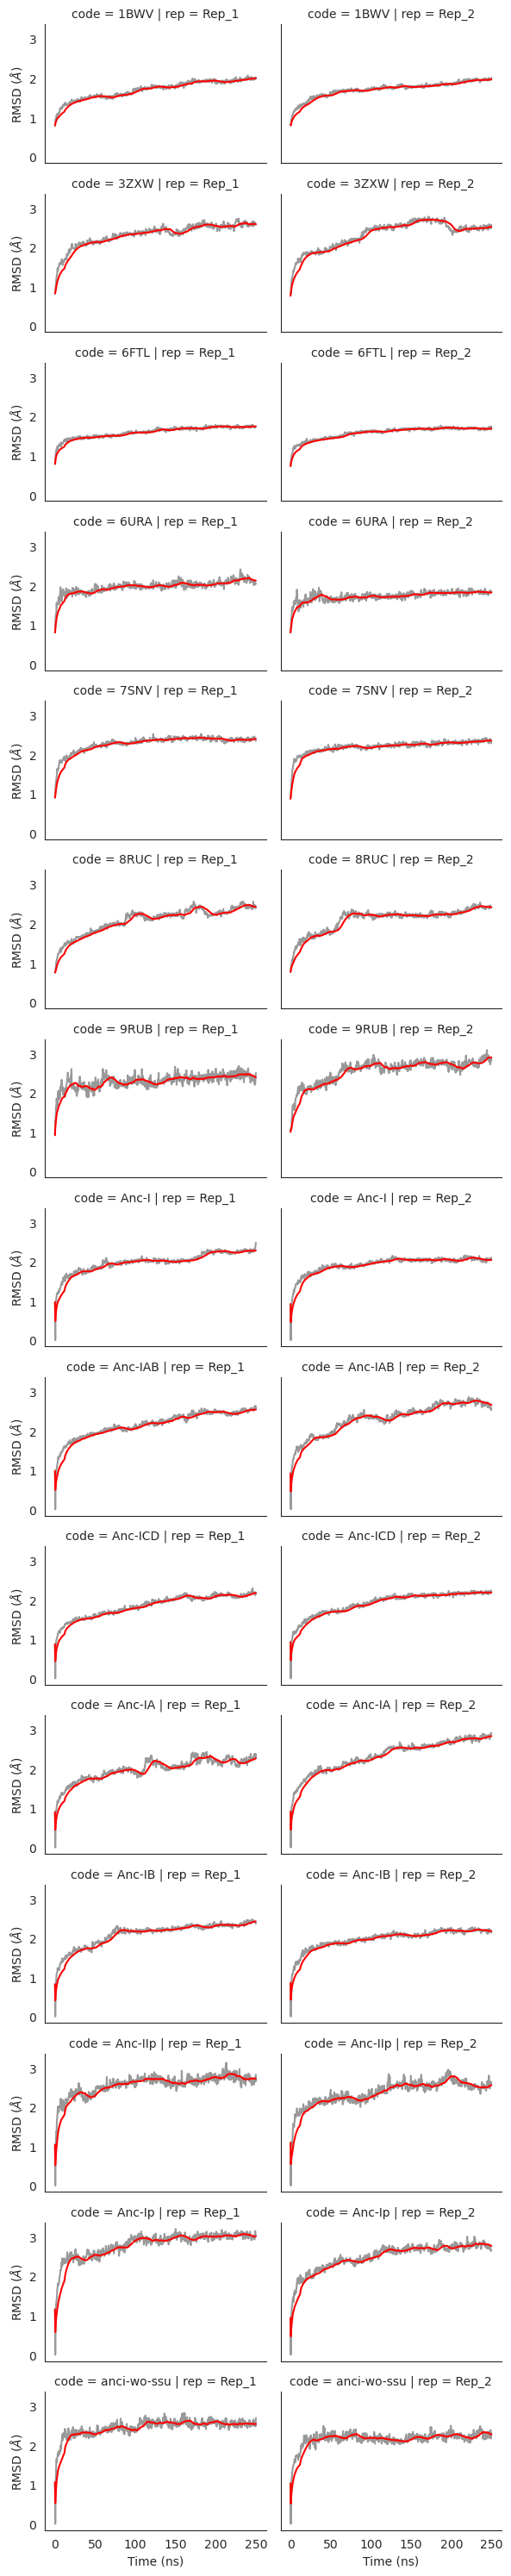

In [ ]:
sns.set_style("white")

g = sns.FacetGrid(exp01_rmsd, col='rep', row='code', height=2, aspect=1.5, sharey=True, sharex=True)
g.map_dataframe(sns.lineplot, x='time_ns', y='CA', alpha=0.4, color="black")
g.map_dataframe(sns.lineplot, x='time_ns', y='CA_moving_avg', color='red')
g.set_axis_labels("Time (ns)", "RMSD ($\AA$)") 

plt.savefig('./ind_RMSD_with_reps.svg')
plt.show()


In [115]:
exp01_rmsd

,frame,time,CA,upperSSU,lowerSSU,ssu,upperLSU,lowerLSU,lsu,code,time_ns,rep,CA_moving_avg
0,0,0.000000,0.792620,0.913764,0.899862,0.906840,0.763346,0.748524,0.755971,1BWV,0.0,Rep_1,0.792620
1,1,0.048888,0.857642,0.904627,0.922675,0.913695,0.813154,0.867076,0.840548,1BWV,0.4,Rep_1,0.825131
2,2,0.097776,0.964732,1.124630,1.103657,1.114193,0.903056,0.929632,0.916440,1BWV,0.8,Rep_1,0.871665
3,3,0.146665,0.955489,1.039781,1.059277,1.049574,0.925316,0.927036,0.926177,1BWV,1.2,Rep_1,0.892621
4,4,0.195553,1.011892,1.102260,1.173955,1.138672,0.992230,0.950736,0.971705,1BWV,1.6,Rep_1,0.916475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,620,620.000020,2.261716,NaN,NaN,NaN,2.298707,2.224110,2.261716,anci-wo-ssu,248.0,Rep_2,2.287607
18746,621,621.000020,2.389217,NaN,NaN,NaN,2.472477,2.302948,2.389217,anci-wo-ssu,248.4,Rep_2,2.288716
18747,622,622.000020,2.169963,NaN,NaN,NaN,2.182310,2.157545,2.169963,anci-wo-ssu,248.8,Rep_2,2.280347
18748,623,623.000020,2.278286,NaN,NaN,NaN,2.346764,2.207685,2.278286,anci-wo-ssu,249.2,Rep_2,2.275642


### RMSD over subunits

We compute the average structure RMSD by subunits.

First, we need to generate all the average subunits.

In [116]:
exp01_rmsd_avg_rep1 = pd.read_pickle("./exp01_rmsd_avg.pkl")
exp01_rmsd_avg_rep2 = pd.read_pickle("./exp01_rmsd_avg_rep2.pkl")

## RbcL and RbcS subunit-wise RMSD

In [117]:
exp01_rmsd_avg_vals_rep1 = exp01_rmsd_avg_rep1[(exp01_rmsd_avg_rep1.time_ns > 50) & (exp01_rmsd_avg_rep1.time_ns < 250)]
exp01_rmsd_avg_vals_rep1 = exp01_rmsd_avg_vals_rep1.groupby(['code']).mean().drop(columns=['frame', 'time', 'time_ns'])
exp01_rmsd_avg_vals_rep1["rep"] = "Rep_1"

exp01_rmsd_avg_vals_rep2 = exp01_rmsd_avg_rep2[(exp01_rmsd_avg_rep2.time_ns > 50) & (exp01_rmsd_avg_rep2.time_ns < 250)]
exp01_rmsd_avg_vals_rep2 = exp01_rmsd_avg_vals_rep2.groupby(['code']).mean().drop(columns=['frame', 'time', 'time_ns'])
exp01_rmsd_avg_vals_rep2 = exp01_rmsd_avg_vals_rep2.query('code not in ["9rub", "anci-wo-ssu"]')
exp01_rmsd_avg_vals_rep2["rep"] = "Rep_2"

exp01_rmsd_avg_vals_rep2
# exp01_rmsd_avg_vals = pd.concat([exp01_rmsd_avg_vals_rep1["code", "CA", "ssu", "lsu"], exp01_rmsd_avg_vals_rep2["code", "CA", "ssu", "lsu"]])
# exp01_rmsd_avg_vals

,CA,ssu,lsu,lsu_A,lsu_E,lsu_I,lsu_M,lsu_C,lsu_G,lsu_K,lsu_O,ssu_B,ssu_F,ssu_J,ssu_N,ssu_D,ssu_H,ssu_L,ssu_P,rep
code,,,,,,,,,,,,,,,,,,,,
1bwv,0.837297,0.802046,0.846876,0.862778,0.850826,0.809591,0.791150,1.058700,0.814261,0.764354,0.746028,0.722800,0.897308,0.783250,0.768765,0.740902,0.846786,0.765590,0.811073,Rep_2
3zxw,1.070176,1.019726,1.078551,0.717119,0.724126,1.385125,0.795736,1.270808,1.003102,1.173854,1.217284,0.948635,1.131177,1.055809,0.968430,0.810354,1.017451,1.041159,0.995858,Rep_2
6ftl,0.784420,0.775114,0.793080,0.743621,0.800792,0.794348,0.852573,0.812245,0.769844,0.651037,0.935116,0.710970,0.755909,0.659951,0.900422,0.752693,0.800008,0.735650,0.959220,Rep_2
6ura,0.804945,NaN,0.804945,0.805438,0.669328,0.762869,0.927531,0.758071,0.903552,0.712045,0.824236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rep_2
7snv,0.826324,0.971570,0.787859,0.827747,0.792373,0.840461,0.784016,0.723771,0.718601,0.774327,0.804454,0.936712,1.031126,0.937104,0.915731,0.988927,0.998763,1.000115,0.852373,Rep_2
8ruc,1.019872,0.999061,1.023290,0.862355,1.179545,0.845069,0.792025,0.889842,1.047634,1.189757,1.136081,0.916582,0.992503,1.079611,1.041473,0.865685,0.844663,1.084466,1.051162,Rep_2
anci,0.887899,1.031451,0.852969,0.704150,0.768951,1.042727,0.780245,0.942982,0.694696,0.875372,0.908028,0.895617,1.000758,1.328151,0.781798,1.064117,0.931617,1.020940,1.028549,Rep_2
ancia,1.134829,1.113795,1.138821,1.273734,1.265932,0.928628,1.366878,1.032884,1.299678,0.922230,0.743529,0.891248,0.913487,1.061489,0.887125,1.141799,1.541268,1.039471,1.198299,Rep_2
anciab,1.133642,1.393798,1.060077,1.053813,0.980047,1.289219,0.758974,0.869703,1.598967,0.710865,0.811920,0.963112,0.924241,1.625981,1.900062,0.833556,2.117158,0.911298,0.936549,Rep_2


In [132]:
np.sort(exp01_rmsd_avg_vals['lsu'].values), np.sort(exp01_rmsd_avg_vals['ssu'].values)

(array([0.73037244, 0.78718533, 0.86154871, 0.88065137, 0.92702048,
        0.9324405 , 0.96468156, 0.96516344, 0.98465968, 1.00237232,
        1.01008684, 1.01775772, 1.21792881]),
 array([0.75532653, 0.83470485, 0.91260494, 0.91287975, 0.95411083,
        0.99270914, 0.99971165, 1.07233689, 1.0753763 , 1.34746749,
               nan,        nan,        nan]))

In [118]:
lsu_cols = ['lsu_A', 'lsu_E', 'lsu_I', 'lsu_M', 'lsu_C', 'lsu_G', 'lsu_K', 'lsu_O']
ssu_cols = ['ssu_B', 'ssu_F', 'ssu_J', 'ssu_N', 'ssu_D', 'ssu_H', 'ssu_L', 'ssu_P']

In [119]:
avg_rec = []

for i, j in exp01_rmsd_avg_vals_rep1.iterrows():
    lsu_avg_sub = [j.lsu_A, j.lsu_E, j.lsu_I, j.lsu_M, j.lsu_C, j.lsu_G, j.lsu_K, j.lsu_O]
    ssu_avg_sub = [j.ssu_B, j.ssu_F, j.ssu_J, j.ssu_N, j.ssu_D, j.ssu_H, j.ssu_L, j.ssu_P]
    # avg_rec.append(dict(code = i, lsu_avg_sub = [j.lsu_A, j.lsu_E, j.lsu_I, j.lsu_M, j.lsu_C, j.lsu_G, j.lsu_K, j.lsu_O], ssu_avg = [j.ssu_B, j.ssu_F, j.ssu_J, j.ssu_N, j.ssu_D, j.ssu_H, j.ssu_L, j.ssu_P]))
    for k in range(8):
        avg_rec.append(dict(code = i, lsu_sub_val = lsu_avg_sub[k], ssu_sub_val = ssu_avg_sub[k]))

exp01_sub_avg_vals_rep1 = pd.DataFrame.from_records(avg_rec)
exp01_sub_avg_vals_rep1 = exp01_sub_avg_vals_rep1.replace(['1bwv', '3zxw', '6ftl', '6ura', '7snv', '8ruc', 'anci', 'ancia', 'anciab', 'ancib', 'ancicd', 'anciip', 'ancip'], ['1BWV', '3ZXW', '6FTL', '6URA', '7SNV', '8RUC', 'Anc-I', 'Anc-IA', 'Anc-IAB', 'Anc-IB', 'Anc-ICD', "Anc-I/I'", "Anc-I'"])
exp01_sub_avg_vals_rep1["rep"] = "Rep_1"

In [120]:
avg_rec = []

for i, j in exp01_rmsd_avg_vals_rep2.iterrows():
    lsu_avg_sub = [j.lsu_A, j.lsu_E, j.lsu_I, j.lsu_M, j.lsu_C, j.lsu_G, j.lsu_K, j.lsu_O]
    ssu_avg_sub = [j.ssu_B, j.ssu_F, j.ssu_J, j.ssu_N, j.ssu_D, j.ssu_H, j.ssu_L, j.ssu_P]
    # avg_rec.append(dict(code = i, lsu_avg_sub = [j.lsu_A, j.lsu_E, j.lsu_I, j.lsu_M, j.lsu_C, j.lsu_G, j.lsu_K, j.lsu_O], ssu_avg = [j.ssu_B, j.ssu_F, j.ssu_J, j.ssu_N, j.ssu_D, j.ssu_H, j.ssu_L, j.ssu_P]))
    for k in range(8):
        avg_rec.append(dict(code = i, lsu_sub_val = lsu_avg_sub[k], ssu_sub_val = ssu_avg_sub[k]))

exp01_sub_avg_vals_rep2 = pd.DataFrame.from_records(avg_rec)
exp01_sub_avg_vals_rep2 = exp01_sub_avg_vals_rep2.replace(['1bwv', '3zxw', '6ftl', '6ura', '7snv', '8ruc', 'anci', 'ancia', 'anciab', 'ancib', 'ancicd', 'anciip', 'ancip'], ['1BWV', '3ZXW', '6FTL', '6URA', '7SNV', '8RUC', 'Anc-I', 'Anc-IA', 'Anc-IAB', 'Anc-IB', 'Anc-ICD', "Anc-I/I'", "Anc-I'"])
exp01_sub_avg_vals_rep2["rep"] = "Rep_2"

In [121]:
exp01_sub_avg_vals = pd.concat([exp01_sub_avg_vals_rep1, exp01_sub_avg_vals_rep2], ignore_index=True)

In [122]:
exp01_sub_avg_vals['lsu_sub_val'].mean(), exp01_sub_avg_vals['ssu_sub_val'].mean()

(0.9280675650701158, 0.9639548102680283)

In [125]:
exp01_sub_avg_vals.groupby('code')['lsu_sub_val'].mean()

code
1BWV        0.841615
3ZXW        1.005175
6FTL        0.757857
6URA        0.828880
7SNV        0.782225
8RUC        0.987589
Anc-I       0.892501
Anc-I'      1.134498
Anc-I/I'    1.045178
Anc-IA      1.009498
Anc-IAB     0.986204
Anc-IB      0.888114
Anc-ICD     0.905544
Name: lsu_sub_val, dtype: float64

In [123]:
exp01_sub_avg_vals.groupby('code')['ssu_sub_val'].mean()

code
1BWV        0.806449
3ZXW        1.022911
6FTL        0.765382
6URA             NaN
7SNV        0.970625
8RUC        0.960790
Anc-I       1.029356
Anc-I'           NaN
Anc-I/I'         NaN
Anc-IA      1.032564
Anc-IAB     1.258978
Anc-IB      0.892608
Anc-ICD     0.899884
Name: ssu_sub_val, dtype: float64

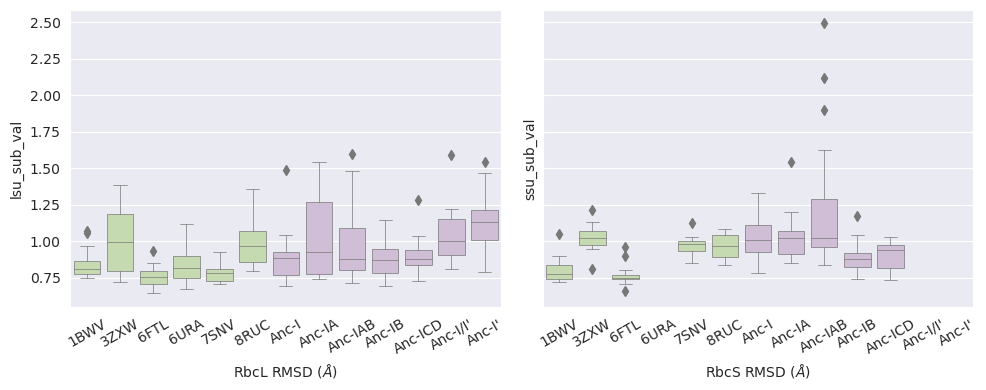

In [128]:
code_palette_cap = {
    "6FTL": "#C6E1AB",
    "3ZXW": "#C6E1AB",
    "8RUC": "#C6E1AB",
    "1BWV": "#C6E1AB",
    "7SNV": "#C6E1AB",
    "6URA": "#C6E1AB",
    "Anc-I/I'": "#D1BADA",
    "Anc-I'": "#D1BADA",
    "Anc-I": "#D1BADA",
    "Anc-IAB": "#D1BADA",
    "Anc-ICD": "#D1BADA",
    "Anc-IA": "#D1BADA",
    "Anc-IB": "#D1BADA",
}

sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(10, 4)
sns.boxplot(data=exp01_sub_avg_vals, x='code', y='lsu_sub_val', ax=ax[0], palette=code_palette_cap, linewidth=0.5)
sns.boxplot(data=exp01_sub_avg_vals, x='code', y='ssu_sub_val', ax=ax[1], palette=code_palette_cap, linewidth=0.5)
ax[0].tick_params(axis='x', labelrotation=30)
ax[1].tick_params(axis='x', labelrotation=30)
ax[0].set_xlabel('RbcL RMSD ($\AA$)', fontname='Arial')
ax[1].set_xlabel('RbcS RMSD ($\AA$)', fontname='Arial')
plt.tight_layout()
plt.savefig("./RMSD_avg_boxplot_rbcL_rbcS_both_replicates.svg")

## Statistical analysis

In [129]:
exp01_lsu_only_avg_vals = exp01_sub_avg_vals[['code', 'lsu_sub_val']]
exp01_ssu_only_avg_vals = exp01_sub_avg_vals[['code', 'ssu_sub_val']]

### Comparing average RMSD between RbcL & RbcS

In [130]:
from scipy.stats import f_oneway
import statsmodels.stats.multicomp as mc

f_oneway(*[group['lsu_sub_val'] for name, group in exp01_lsu_only_avg_vals.groupby('code')])

F_onewayResult(statistic=6.32237541086285, pvalue=2.0473340616284416e-09)

In [136]:
lsu_anova = f_oneway(*[group['lsu_sub_val'] for name, group in exp01_lsu_only_avg_vals.groupby('code')])
lsu_mc_model = mc.MultiComparison(exp01_lsu_only_avg_vals['lsu_sub_val'], exp01_lsu_only_avg_vals['code'])
lsu_tukey = lsu_mc_model.tukeyhsd()
# lsu_tukey.summary()
lsu_tukey_df = pd.DataFrame(data= lsu_tukey._results_table.data[1:], columns=lsu_tukey._results_table.data[0])
# lsu_tukey_df[lsu_tukey_df.reject.isin([True])]
lsu_tukey_df[lsu_tukey_df['p-adj'] < 0.01]

,group1,group2,meandiff,p-adj,lower,upper,reject
6,1BWV,Anc-I',0.2929,0.0003,0.0842,0.5015,True
12,3ZXW,6FTL,-0.2473,0.0063,-0.4560,-0.0387,True
27,6FTL,Anc-I',0.3766,0.0000,0.1680,0.5853,True
28,6FTL,Anc-I/I',0.2873,0.0005,0.0787,0.4960,True
29,6FTL,Anc-IA,0.2516,0.0049,0.0430,0.4603,True
36,6URA,Anc-I',0.3056,0.0001,0.0970,0.5143,True
44,7SNV,Anc-I',0.3523,0.0000,0.1436,0.5609,True
45,7SNV,Anc-I/I',0.2630,0.0025,0.0543,0.4716,True
57,Anc-I,Anc-I',0.2420,0.0086,0.0334,0.4506,True
66,Anc-I',Anc-IB,-0.2464,0.0067,-0.4550,-0.0377,True
